In [17]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.optimize as opt

the best_line_slope for the graph "Number of counted fringes Vs. Pressure change" is equal to 0.2574157445197122
the error on the slope is equal to [0.00954796]
the calculated value for the refraction index of air is equal to 1.0000208678363558


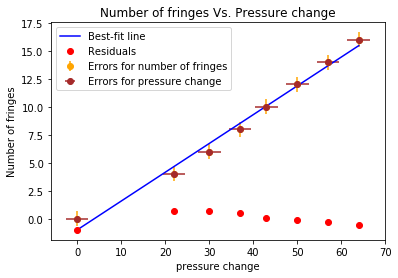

In [19]:
pressure_change = np.array([0,22,30,37,43,50,57,64])
number_of_fringes = np.array([0,4,6,8,10,12,14,16])
fig, ax = plt.subplots(1,1)
ax.plot(pressure_change, number_of_fringes, 'k.')
ax.set_title('Number of fringes Vs. Pressure change')
ax.set_xlabel('pressure change')
ax.set_ylabel('Number of fringes')

# fitting a straight line to the plot using the least squares fit
delta = len(pressure_change)*sum(pressure_change**2) - sum(pressure_change)**2
best_line_slope = (len(pressure_change)*sum(number_of_fringes*pressure_change) - sum(pressure_change)*sum(number_of_fringes))/delta # calculate the slope of the best-fit line.
best_line_intercept = (sum(pressure_change**2)*sum(number_of_fringes)-sum(pressure_change)*sum(number_of_fringes*pressure_change))/delta # calculate the intercept of the best-fit line.
best_fit_line = pressure_change * best_line_slope + best_line_intercept # the equation of the best line.
plt.plot(pressure_change,best_fit_line, color = 'blue', label = 'Best-fit line') # the best_line_slope is equal to m = ΔN/ΔP
print('the best_line_slope for the graph "Number of counted fringes Vs. Pressure change" is equal to',best_line_slope)

def mean(numbers): # defining a function that calculates the mean.
    return sum(numbers)/len(numbers)
def std(numbers): # defining a function that calculates the standard deviation of the mean.
    return math.sqrt(sum((np.array(numbers)-mean(numbers))**2)/(len(numbers)*(len(numbers) - 1)))

# calculations regarding error bars for pressure_change and number of counted fringes

standardErrorY = std(number_of_fringes)/math.sqrt(len(number_of_fringes)) # calculates the error bar for number of fringes.
eY = [standardErrorY]*len(number_of_fringes)
plt.errorbar(pressure_change, number_of_fringes, yerr=eY, fmt='o', color = 'orange', label = 'Errors for number of fringes') # adds the error bars to the number of fringes as orange lines.
standardErrorX = std(pressure_change)/math.sqrt(len(number_of_fringes))
eX = [standardErrorX]*len(pressure_change)
plt.errorbar(pressure_change, number_of_fringes, xerr=eX, fmt='o',color = 'brown', label = 'Errors for pressure change') # plots the error bars for the pressure change as brown lines.

# plotting the residuals
discrepancy = best_fit_line - number_of_fringes # calculates the discrepancies between the  energy and its best fit line values.
plt.plot(pressure_change, discrepancy, 'bo',color = 'red', label = 'Residuals') # plots the residuals as red dots.


# finding the linear equation of refraction index and the standard deviation for the slope(m_prime)
def refraction_calculator(m_prime, pressure_change):
    return m_prime * pressure_change + 1
# m_prime = the slope
# pressure_change = pressure in cm Hg
#refraction_index_air = refraction_calculator(m_prime, 76)
#Fit for parameters m_prime and p from the function 'refraction_calculator'
best_params, cov_matrix = opt.curve_fit(refraction_calculator, pressure_change, number_of_fringes, p0 = [0.25])
standard_deviation = np.sqrt(np.diag(cov_matrix))
print('the error on the slope is equal to', standard_deviation)
cell_length = 0.3 # the length of the vacuum cell in meter.
wavelength = 640 * 10**(-9)
#index_refraction_change = number_of_fringes*wavelength/(2*cell_length)
m_prime = best_line_slope * wavelength / (2 * cell_length) # index_refraction = m_prime * pressure + 1
pressure = np.linspace(0,100)
index_refraction = m_prime * pressure + 1

index_refraction_air_atmospheric = m_prime * 76 + 1
print('the calculated value for the refraction index of air is equal to',index_refraction_air_atmospheric)


plt.legend() 

Plotting the graph of refractive index Vs. pressure

Text(0,0.5,'refractive index')

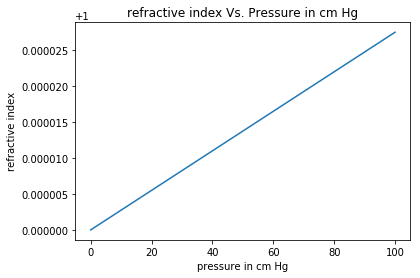

In [20]:
fig, ax = plt.subplots(1,1)
ax.plot(pressure, index_refraction)
ax.set_title('refractive index Vs. Pressure in cm Hg')
ax.set_xlabel('pressure in cm Hg')
ax.set_ylabel('refractive index')